<a href="https://colab.research.google.com/github/joseduardogon/alternative_solution_konigsberg_bridge_problem/blob/master/Alternative_solution_Konigsberg_bridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Project is based on this Short Paper
[Alternative solution for konigsberg bridge problem
through the concept of matching](https://drive.google.com/file/d/1iw4Yt8ducGcpe_cGYvnw7cl18eRxiP0S/view?usp=drive_link)

In [1]:
!pip install pyvis matplotlib pandas

In [16]:
from pyvis import network as net
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [17]:
config = 0

g=net.Network(notebook=True, cdn_resources="in_line")
nhg = nx.Graph()

g.from_nx(nhg)

if config == 1:
    g.show_buttons(filter_=['physics'])
else:
    g.set_options("""
        const options = {
            "physics": {
                "barnesHut": {
                    "centralGravity": 0.001,
                    "avoidOverlap": 0.1,
                    "springLength": 150
                },
                "minVelocity": 0.75
            }
        }
    """)

In [18]:
g.add_node("E", label="-", x=0,   y=0,     fixed=True, color="orange")
g.add_node("A", label="A", x=0,   y=0,     fixed=True, color="orange")
g.add_node("B", label="B", x=150, y= 100,  fixed=True, color="orange")
g.add_node("C", label="C", x=150, y= -100, fixed=True, color="orange")
g.add_node("D", label="D", x=300, y=0,     fixed=False, color="orange")

g.add_edge("A", "B", smooth=False, color="Black", label="E1")  # A - B
g.add_edge("A", "C", smooth=False, color="Black", label="E2")  # A - C
g.add_edge("A", "D", smooth=False, color="Black", label="E3")  # A - D
g.add_edge("B", "D", smooth=False, color="Black", label="E6")  # B - D
g.add_edge("C", "D", smooth=False, color="Black", label="E5")  # C - D


# Adicionando arestas duplicadas com curva para evitar interseção
g.add_edge("E", "B", smooth={"type": "curvedCCW"}, color="Black", label="E7")  # A - B curva no sentido horário
g.add_edge("E", "C", smooth={"type": "curvedCW"}, color="Black", label="E4")  # A - C curva no sentido horário


g.show("example.html")

graph_koenigsberg = {
    'A': ['B', 'B', 'C', 'C', 'D'],
    'B': ['A', 'A', 'D'],
    'C': ['A', 'A', 'D'],
    'D': ['A', 'B', 'C']
}

edges_graph_koenigsberg = {
    ('A', 'B'): 'E1',
    ('A', 'C'): 'E2',
    ('A', 'D'): 'E3',
    ('C', 'A'): 'E4',
    ('C', 'D'): 'E5',
    ('B', 'D'): 'E6',
    ('B', 'A'): 'E7'
}

example.html


Grafo Ponte de Koenigsberg

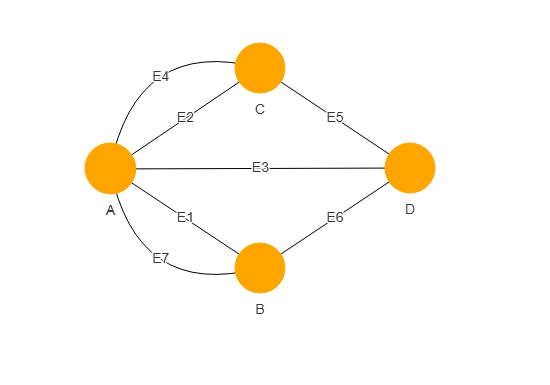

Funções para cálculo de Maximal e Maximum Matching

In [5]:
def calculate_maximal_matching(graph, edges):
    """Calcula um emparelhamento maximal e verifica os graus dos nós"""

    vertex_degrees = {node: len(neighbors) for node, neighbors in graph.items()}

    odd_degree_nodes = {node: degree for node, degree in vertex_degrees.items() if degree % 2 != 0}

    available_edges = set(edges.keys())

    matched_nodes = set()
    maximal_matching = set()

    for (u, v) in available_edges:
        if u not in matched_nodes and v not in matched_nodes:
            maximal_matching.add(edges[(u, v)] if (u, v) in edges else edges[(v, u)])
            matched_nodes.add(u)
            matched_nodes.add(v)

    print("📌 Graus dos vértices:")
    for node, degree in vertex_degrees.items():
        print(f"   {node}: {degree} (Ímpar ✅)" if degree % 2 != 0 else f"   {node}: {degree} (Par ❌)")

    print("\n✅ Todos os vértices são ímpares:", all(degree % 2 != 0 for degree in vertex_degrees.values()))

    print("\n🔹 Maximal Matching encontrado:", maximal_matching)

    return maximal_matching

In [7]:
import itertools

def calculate_maximum_matching(graph, edges):
    """Calcula um emparelhamento máximo no grafo"""

    available_edges = list(edges.keys())

    all_matchings = []

    for size in range(1, len(graph) // 2 + 1):
        for subset in itertools.combinations(available_edges, size):
            used_nodes = set()
            valid_matching = set()

            for u, v in subset:
                if u not in used_nodes and v not in used_nodes:
                    valid_matching.add(edges[(u, v)] if (u, v) in edges else edges[(v, u)])
                    used_nodes.add(u)
                    used_nodes.add(v)

            all_matchings.append(valid_matching)

    maximum_matching = max(all_matchings, key=len)

    print("🔹 Maximum Matching encontrado:", maximum_matching)

    return maximum_matching

In [12]:
maximal = calculate_maximal_matching(graph_koenigsberg, edges_graph_koenigsberg)
maximum = calculate_maximum_matching(graph_koenigsberg, edges_graph_koenigsberg)

📌 Graus dos vértices:
   A: 5 (Ímpar ✅)
   B: 3 (Ímpar ✅)
   C: 3 (Ímpar ✅)
   D: 3 (Ímpar ✅)

✅ Todos os vértices são ímpares: True

🔹 Maximal Matching encontrado: {'E2', 'E6'}
🔹 Maximum Matching encontrado: {'E5', 'E1'}


In [13]:
def generate_matching_table(graph, edges, maximal, maximum):
    """Gera uma tabela visual com os resultados de Maximal Matching, Maximum Matching, nós e arestas"""

    node_degrees = {node: len(neighbors) for node, neighbors in graph.items()}
    nodes_df = pd.DataFrame(list(node_degrees.items()), columns=["Nó", "Grau"])

    edges_df = pd.DataFrame(list(edges.items()), columns=["Aresta", "ID"])

    matching_data = {
        "Maximal Matching": [", ".join(maximal)] if maximal else ["Nenhum"],
        "Maximum Matching": [", ".join(maximum)] if maximum else ["Nenhum"]
    }
    matching_df = pd.DataFrame(matching_data)

    fig, axes = plt.subplots(3, 1, figsize=(8, 6))
    fig.suptitle("Resultados do Problema da Ponte de Königsberg", fontsize=14, fontweight="bold")

    axes[0].axis("tight")
    axes[0].axis("off")
    axes[0].table(cellText=nodes_df.values, colLabels=nodes_df.columns, cellLoc="center", loc="center")
    axes[0].set_title("Nós e Seus Graus")

    axes[1].axis("tight")
    axes[1].axis("off")
    axes[1].table(cellText=edges_df.values, colLabels=edges_df.columns, cellLoc="center", loc="center")
    axes[1].set_title("Arestas do Grafo")

    axes[2].axis("tight")
    axes[2].axis("off")
    axes[2].table(cellText=matching_df.values, colLabels=matching_df.columns, cellLoc="center", loc="center")
    axes[2].set_title("Resultados do Maximal e Maximum Matching")

    plt.tight_layout()
    plt.savefig("matching_results.png", dpi=150, bbox_inches="tight")
    plt.show()

    print("📌 Tabela gerada e salva como 'matching_results.png'")

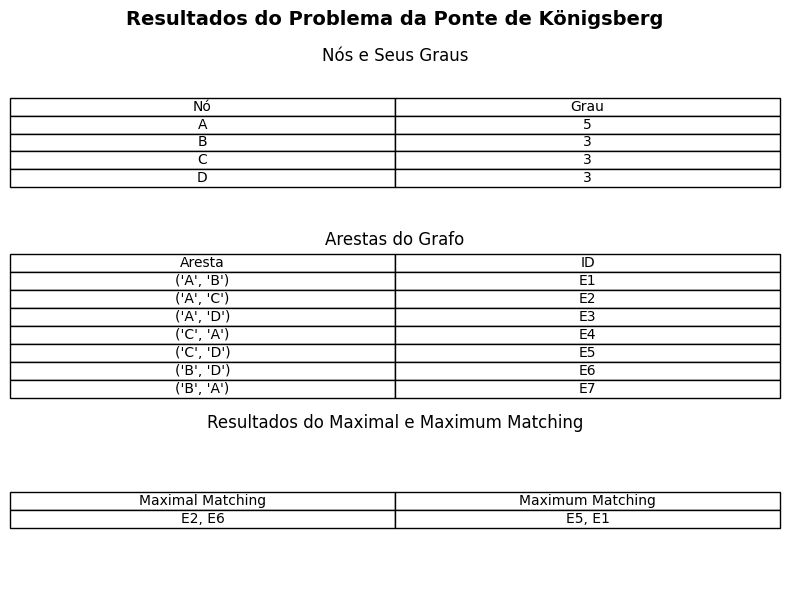

📌 Tabela gerada e salva como 'matching_results.png'


In [14]:
generate_matching_table(graph_koenigsberg, edges_graph_koenigsberg, maximal, maximum)

**Soluções Propostas no Artigo**

In [20]:
g=net.Network(notebook=True, cdn_resources="remote", directed=True)
nhg = nx.Graph()

g.from_nx(nhg)

g.set_options("""
    const options = {
            "physics": {
                "barnesHut": {
                    "centralGravity": 0.001,
                    "avoidOverlap": 0.1,
                    "springLength": 150
                },
                "minVelocity": 0.75
            }
        }
    """)

g.add_node("E", label="-", x=0,   y=0,     fixed=True, color="orange")
g.add_node("A", label="A", x=0,   y=0,     fixed=True, color="orange")
g.add_node("B", label="B", x=150, y= 100,  fixed=True, color="red")
g.add_node("C", label="C", x=150, y= -100, fixed=True, color="green")
g.add_node("D", label="D", x=300, y=0,     fixed=True, color="orange")

g.add_edge("A", "B", smooth=False, color="red", label="E1")
g.add_edge("C", "A", smooth=False, color="Black", label="E2")
g.add_edge("D", "A", smooth=False, color="Black", label="E3")
g.add_edge("D", "B", smooth=False, color="Black", label="E6")
g.add_edge("C", "D", smooth=False, color="green", label="E5")


# Adicionando arestas duplicadas com curva para evitar interseção
g.add_edge("B", "E", smooth={"type": "curvedCW"}, color="Black", label="E7")
g.add_edge("E", "C", smooth={"type": "curvedCW"}, color="Black", label="E4")

g.add_edge("E", "D", smooth={"type": "curvedCW", "roundness": 0.2}, color="rgb(27,79,143)", tickness=10, label="E8")
g.show("solution_1.html")

example.html


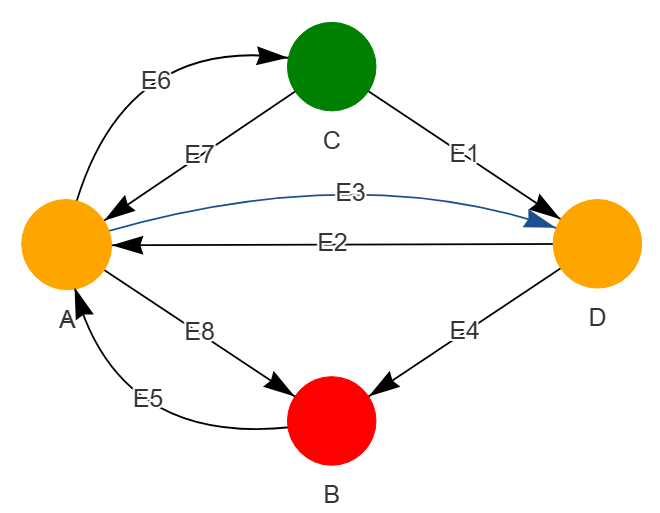

In [ ]:
g=net.Network(notebook=True, cdn_resources="remote", directed=True)
nhg = nx.Graph()

g.from_nx(nhg)

g.set_options("""
    const options = {
            "physics": {
                "barnesHut": {
                    "centralGravity": 0.001,
                    "avoidOverlap": 0.1,
                    "springLength": 150
                },
                "minVelocity": 0.75
            }
        }
    """)

g.add_node("E", label="-", x=0,   y=0,     fixed=True, color="orange")
g.add_node("A", label="A", x=0,   y=0,     fixed=True, color="green")
g.add_node("B", label="B", x=150, y= 100,  fixed=True, color="orange")
g.add_node("C", label="C", x=150, y= -100, fixed=True, color="orange")
g.add_node("D", label="D", x=300, y=0,     fixed=True, color="red")

g.add_edge("A", "B", smooth=False, color="Black", label="E4")
g.add_edge("C", "A", smooth=False, color="Black", label="E3")
g.add_edge("A", "D", smooth=False, color="Black", label="E1")
g.add_edge("B", "D", smooth=False, color="Black", label="E8")
g.add_edge("D", "C", smooth=False, color="Black", label="E2")


# Adicionando arestas duplicadas com curva para evitar interseção
g.add_edge("B", "E", smooth={"type": "curvedCW"}, color="Black", label="E5")
g.add_edge("E", "C", smooth={"type": "curvedCW"}, color="Black", label="E6")

g.add_node("Y", label=".", x=-50, y= 0, fixed=False, color="rgb(27,79,143)", size=1)
g.add_edge("Y", "B", smooth={"type": "curvedCCW", "roundness": "0.7"}, color="rgb(27,79,143)", tickness=10, label="E7")
g.add_edge("C", "Y", smooth={"type": "curvedCCW", "roundness": "0.7"}, color="rgb(27,79,143)", tickness=10)
g.show("solution_2.html")

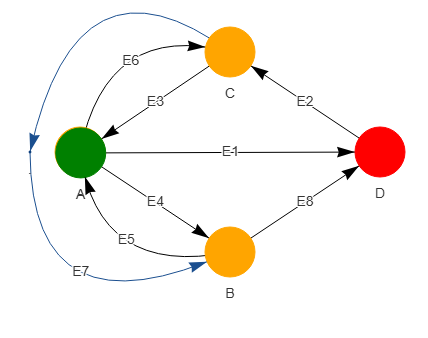

In [ ]:
g=net.Network(notebook=True, cdn_resources="remote", directed=True)
nhg = nx.Graph()

g.from_nx(nhg)

g.set_options("""
    const options = {
            "physics": {
                "barnesHut": {
                    "centralGravity": 0.001,
                    "avoidOverlap": 0.1,
                    "springLength": 150
                },
                "minVelocity": 0.75
            }
        }
    """)

g.add_node("E", label="-", x=0,   y=0,     fixed=True, color="orange")
g.add_node("A", label="A", x=0,   y=0,     fixed=True, color="green")
g.add_node("B", label="B", x=150, y= 100,  fixed=True, color="orange")
g.add_node("C", label="C", x=150, y= -100, fixed=True, color="red")
g.add_node("D", label="D", x=300, y=0,     fixed=True, color="orange")

g.add_edge("B", "A", smooth=False, color="Black", label="E3")
g.add_edge("A", "C", smooth=False, color="Black", label="E4")
g.add_edge("A", "D", smooth=False, color="Black", label="E1")
g.add_edge("D", "B", smooth=False, color="Black", label="E2")
g.add_edge("D", "C", smooth=False, color="Black", label="E8")


# Adicionando arestas duplicadas com curva para evitar interseção
g.add_edge("E", "B", smooth={"type": "curvedCCW"}, color="Black", label="E6")
g.add_edge("C", "E", smooth={"type": "curvedCCW"}, color="Black", label="E5")

g.add_node("Y", label=".", x=300, y=0, fixed=True, color="orange", size=1)
g.add_edge("B", "Y", smooth={"type": "curvedCCW"}, color="rgb(27,79,143)", tickness=10, label="E7")
g.show("solution_3.html")

**Outras Soluções**

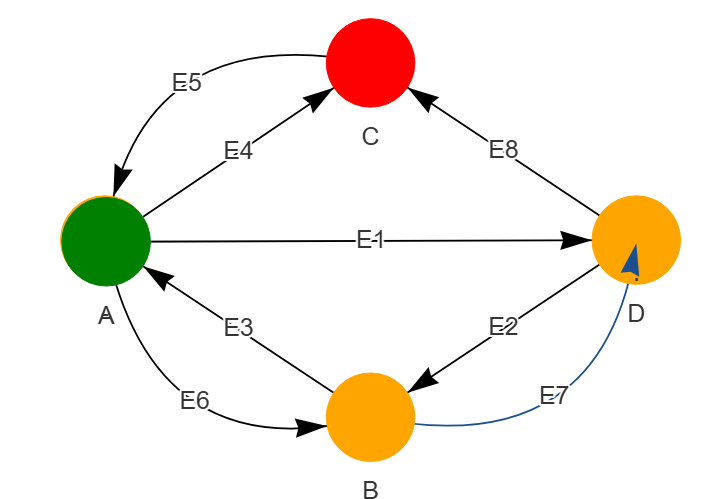

In [ ]:
g=net.Network(notebook=True, cdn_resources="remote", directed=True)
nhg = nx.Graph()

g.from_nx(nhg)

g.set_options("""
    const options = {
            "physics": {
                "barnesHut": {
                    "centralGravity": 0.001,
                    "avoidOverlap": 0.1,
                    "springLength": 150
                },
                "minVelocity": 0.75
            }
        }
    """)

g.add_node("E", label="-", x=0,   y=0,     fixed=True, color="orange")
g.add_node("A", label="A", x=0,   y=0,     fixed=True, color="green")
g.add_node("B", label="B", x=150, y= 100,  fixed=True, color="red")
g.add_node("C", label="C", x=150, y= -100, fixed=True, color="orange")
g.add_node("D", label="D", x=300, y=0,     fixed=True, color="orange")

g.add_edge("A", "B", smooth=False, color="Black", label="E4")
g.add_edge("C", "A", smooth=False, color="Black", label="E3")
g.add_edge("A", "D", smooth=False, color="Black", label="E1")
g.add_edge("D", "B", smooth=False, color="Black", label="E8")
g.add_edge("D", "C", smooth=False, color="Black", label="E2")


# Adicionando arestas duplicadas com curva para evitar interseção
g.add_edge("B", "E", smooth={"type": "curvedCW"}, color="Black", label="E5")
g.add_edge("E", "C", smooth={"type": "curvedCW"}, color="Black", label="E6")

g.add_node("Y", label=".", x=300, y=0, fixed=True, color="orange", size=1)
g.add_edge("C", "Y", smooth={"type": "curvedCW"}, color="rgb(27,79,143)", tickness=10, label="E7")
g.show("solution_4.html")

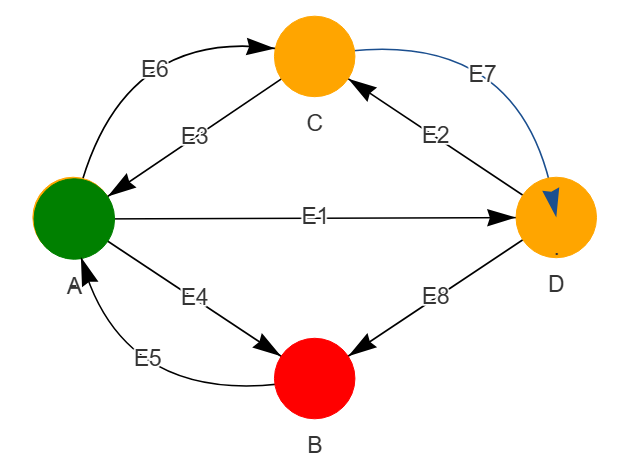

**E se fizessemos duas pontes**

In [ ]:
g=net.Network(notebook=True, cdn_resources="remote", directed=True)
nhg = nx.Graph()

g.from_nx(nhg)

g.set_options("""
    const options = {
            "physics": {
                "barnesHut": {
                    "centralGravity": 0.001,
                    "avoidOverlap": 0.1,
                    "springLength": 150
                },
                "minVelocity": 0.75
            }
        }
    """)

g.add_node("E", label="-", x=0,   y=0,     fixed=True, color="orange")
g.add_node("A", label="A", x=0,   y=0,     fixed=True, color="green")
g.add_node("B", label="B", x=150, y= 100,  fixed=True, color="orange")
g.add_node("C", label="C", x=150, y= -100, fixed=True, color="orange")
g.add_node("D", label="D", x=300, y=0,     fixed=True, color="red")

g.add_edge("A", "B", smooth=False, color="Black", label="E4")
g.add_edge("C", "A", smooth=False, color="Black", label="E3")
g.add_edge("A", "D", smooth=False, color="Black", label="E1")
g.add_edge("D", "B", smooth=False, color="Black", label="E8")
g.add_edge("D", "C", smooth=False, color="Black", label="E2")


# Adicionando arestas duplicadas com curva para evitar interseção
g.add_edge("B", "E", smooth={"type": "curvedCW"}, color="Black", label="E5")
g.add_edge("E", "C", smooth={"type": "curvedCW"}, color="Black", label="E6")

g.add_node("Y", label=".", x=300, y=0, fixed=True, color="orange", size=1)
g.add_edge("C", "Y", smooth={"type": "curvedCW"}, color="rgb(27,79,143)", tickness=10, label="E7")
g.add_edge("B", "Y", smooth={"type": "curvedCCW"}, color="rgb(27,79,143)", tickness=10, label="E9")
g.show("solution_5.html")

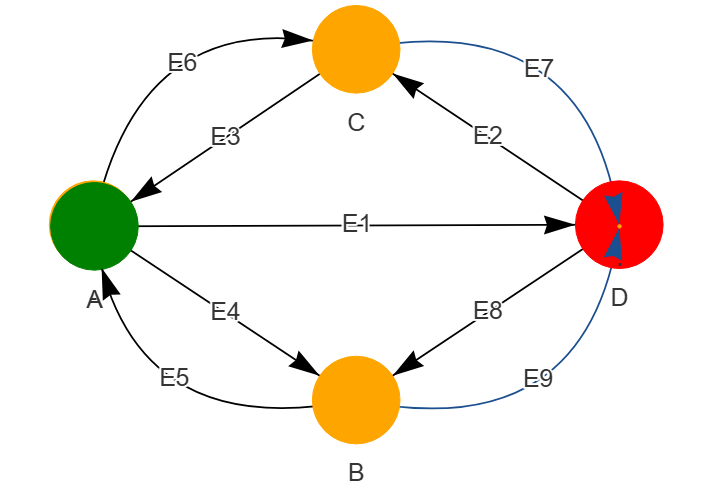

In [ ]:
g=net.Network(notebook=True, cdn_resources="remote", directed=True)
nhg = nx.Graph()

g.from_nx(nhg)

g.set_options("""
    const options = {
            "physics": {
                "barnesHut": {
                    "centralGravity": 0.001,
                    "avoidOverlap": 0.1,
                    "springLength": 150
                },
                "minVelocity": 0.75
            }
        }
    """)

g.add_node("E", label="-", x=0,   y=0,     fixed=True, color="orange")
g.add_node("A", label="A", x=0,   y=0,     fixed=True, color="green")
g.add_node("B", label="B", x=150, y= 100,  fixed=True, color="orange")
g.add_node("C", label="C", x=150, y= -100, fixed=True, color="orange")
g.add_node("D", label="D", x=300, y=0,     fixed=True, color="orange")

g.add_edge("A", "B", smooth=False, color="Black", label="E3")
g.add_edge("C", "A", smooth=False, color="Black", label="E6")
g.add_edge("A", "D", smooth=False, color="Black", label="E1")
g.add_edge("B", "D", smooth=False, color="Black", label="E4")
g.add_edge("D", "C", smooth=False, color="Black", label="E5")


# Adicionando arestas duplicadas com curva para evitar interseção
g.add_edge("B", "E", smooth={"type": "curvedCW"}, color="Black", label="E9")
g.add_edge("E", "C", smooth={"type": "curvedCW"}, color="Black", label="E7")

g.add_node("Y", label=".", x=-50, y= 0, fixed=False, color="rgb(27,79,143)", size=1)
g.add_edge("Y", "B", smooth={"type": "curvedCCW", "roundness": "0.7"}, color="rgb(27,79,143)", tickness=10, label="E8")
g.add_edge("C", "Y", smooth={"type": "curvedCCW", "roundness": "0.7"}, color="rgb(27,79,143)", tickness=10)
g.add_edge("D", "E", smooth={"type": "curvedCCW", "roundness": 0.2}, color="rgb(27,79,143)", tickness=10, label="E2")
g.show("solution_6.html")

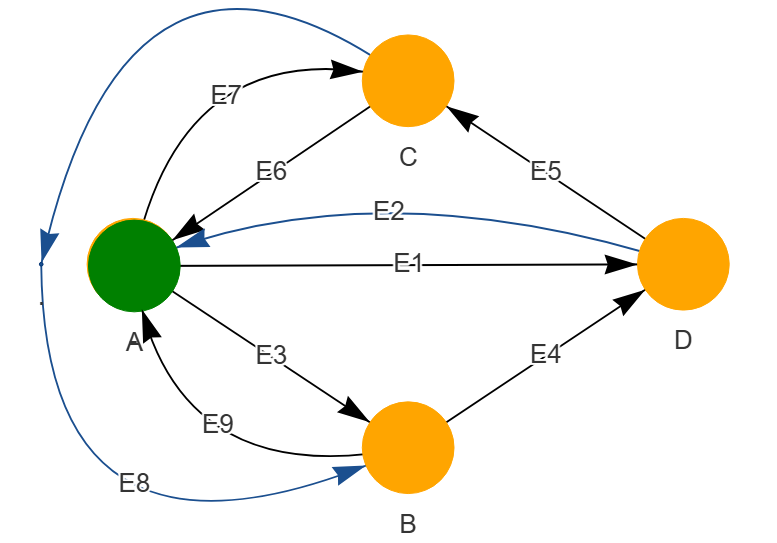

**Solução Básica para Ciclo**

In [ ]:
g=net.Network(notebook=True, cdn_resources="remote", directed=True)
nhg = nx.Graph()

g.from_nx(nhg)

g.set_options("""
    const options = {
            "physics": {
                "barnesHut": {
                    "centralGravity": 0.001,
                    "avoidOverlap": 0.1,
                    "springLength": 150
                },
                "minVelocity": 0.75
            }
        }
    """)

g.add_node("E", label="-", x=0,   y=0,     fixed=True, color="orange")
g.add_node("A", label="A", x=0,   y=0,     fixed=True, color="orange")
g.add_node("B", label="B", x=150, y= 100,  fixed=True, color="green")
g.add_node("C", label="C", x=150, y= -100, fixed=True, color="orange")
g.add_node("D", label="D", x=300, y=0,     fixed=True, color="orange")

g.add_edge("B", "A", smooth=False, color="Black", label="E4")
g.add_edge("A", "C", smooth=False, color="Black", label="E5")
g.add_edge("B", "C", smooth=False, color="Black", label="E1")
g.add_edge("D", "B", smooth=False, color="Black", label="E3")
g.add_edge("C", "D", smooth=False, color="Black", label="E2")


# Adicionando arestas duplicadas com curva para evitar interseção
g.add_edge("E", "B", smooth={"type": "curvedCCW"}, color="Black", label="E7")
g.add_edge("C", "E", smooth={"type": "curvedCCW"}, color="Black", label="E6")

g.show("solution_cicle.html")

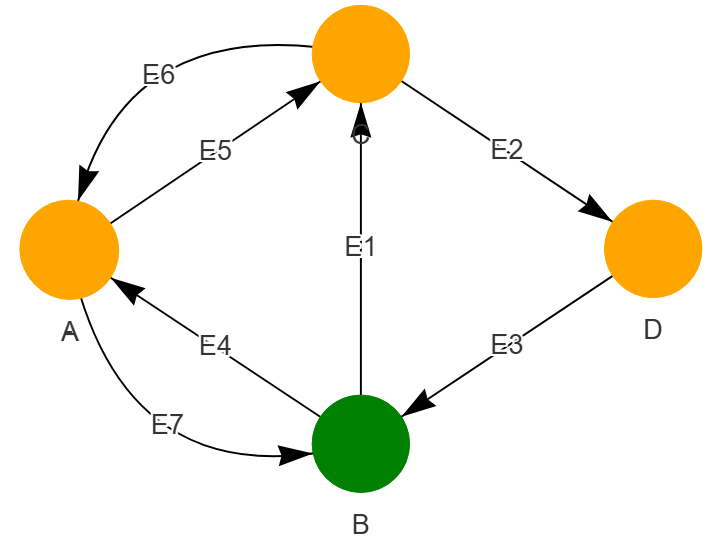